In [1]:
import pandas as pd

cap_data = pd.read_csv("1480_EU_companies.csv")
print(cap_data.head())

   reprisk_id        date  current_rri  rri_trend  peak_rri peak_rri_date  \
0       10481  2007-01-31          0.0        0.0       0.0           NaN   
1       10481  2007-02-28          0.0        0.0       0.0           NaN   
2       10481  2007-02-28          0.0        0.0       0.0           NaN   
3       10481  2007-02-28          0.0        0.0       0.0           NaN   
4       10481  2007-03-31          0.0        0.0       0.0           NaN   

  reprisk_rating  country_sector_average  environmental_percentage  \
0            AAA                     0.0                       0.0   
1            AAA                     0.0                       0.0   
2            AAA                     0.0                       0.0   
3            AAA                     0.0                       0.0   
4            AAA                     0.0                       0.0   

   social_percentage  governance_percentage  primary_isin  \
0                0.0                    0.0  AT00007855

In [2]:
cap_data["year"] = pd.DatetimeIndex(cap_data['date']).year
cap_data["month"] = pd.DatetimeIndex(cap_data['date']).month
print(cap_data["year"].head())
print(cap_data["month"].head())
print(cap_data.shape)

cap_data["year"].dropna()
cap_data["month"].dropna()
print(cap_data.shape)

0    2007
1    2007
2    2007
3    2007
4    2007
Name: year, dtype: int64
0    1
1    2
2    2
3    2
4    3
Name: month, dtype: int64
(221734, 18)
(221734, 18)


In [3]:
cap_10to20 = cap_data[cap_data["year"] >= 2010]
cap_10to20 = cap_10to20[abs(cap_10to20["monthly_return"]) < 10] 
print(cap_10to20.head())

     reprisk_id        date  current_rri  rri_trend  peak_rri peak_rri_date  \
106       10481  2010-01-31          0.0        0.0       0.0           NaN   
107       10481  2010-01-31          0.0        0.0       0.0           NaN   
108       10481  2010-01-31          0.0        0.0       0.0           NaN   
109       10481  2010-02-28          0.0        0.0       0.0           NaN   
110       10481  2010-02-28          0.0        0.0       0.0           NaN   

    reprisk_rating  country_sector_average  environmental_percentage  \
106             AA                    20.0                       0.0   
107             AA                    20.0                       0.0   
108             AA                    20.0                       0.0   
109             AA                    20.0                       0.0   
110             AA                    20.0                       0.0   

     social_percentage  governance_percentage  primary_isin  \
106                0.0       

## EDA


In [4]:
cap_10to20 = cap_10to20.reset_index()
cap_10to20.monthly_return = cap_10to20.monthly_return.fillna(0.0)
returns_not_reported =[]
for i in range(len(cap_10to20.monthly_return)):
    if cap_10to20.monthly_return[i] == 'fail':
        returns_not_reported.append(i)
cap_10to20 = cap_10to20.drop(returns_not_reported)
cap_10to20.monthly_return = cap_10to20.monthly_return.astype(float)  

In [5]:
pd.options.display.max_rows = 100

In [6]:
cap_10to20[cap_10to20['year']==2018].groupby('reprisk_rating').count()

,index,reprisk_id,date,current_rri,rri_trend,peak_rri,peak_rri_date,country_sector_average,environmental_percentage,social_percentage,governance_percentage,primary_isin,name,headquarter_country,ticker,monthly_return,year,month
reprisk_rating,,,,,,,,,,,,,,,,,,
A,1816,1816,1816,1816,1816,1816,1395,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816
AA,1965,1965,1965,1965,1965,1965,1175,1965,1965,1965,1965,1965,1965,1965,1965,1965,1965,1965
AAA,962,962,962,962,962,962,227,962,962,962,962,962,962,962,962,962,962,962
B,484,484,484,484,484,484,437,484,484,484,484,484,484,484,484,484,484,484
BB,888,888,888,888,888,888,704,888,888,888,888,888,888,888,888,888,888,888
BBB,834,834,834,834,834,834,747,834,834,834,834,834,834,834,834,834,834,834
C,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
CC,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
CCC,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280


In [7]:
countgraph = cap_10to20.groupby(['year','reprisk_rating'])['monthly_return'].count().unstack('reprisk_rating').fillna(0)
countgraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D
year,,,,,,,,,,
2010,1600.0,2081.0,1108.0,133.0,233.0,464.0,9.0,86.0,79.0,0.0
2011,1401.0,1501.0,1993.0,191.0,275.0,521.0,0.0,56.0,49.0,1.0
2012,1583.0,1823.0,1437.0,177.0,305.0,671.0,0.0,62.0,57.0,0.0
2013,1705.0,1868.0,1189.0,192.0,260.0,827.0,3.0,49.0,98.0,0.0
2014,1410.0,1903.0,1051.0,285.0,357.0,1251.0,22.0,44.0,181.0,0.0
2015,1510.0,1813.0,1097.0,331.0,462.0,1327.0,25.0,62.0,199.0,0.0
2016,1703.0,2081.0,1089.0,264.0,629.0,1117.0,10.0,65.0,179.0,0.0
2017,1579.0,2139.0,1026.0,294.0,767.0,1214.0,11.0,63.0,203.0,0.0
2018,1816.0,1965.0,962.0,484.0,888.0,834.0,14.0,92.0,280.0,7.0


In [8]:
import numpy as np

In [9]:
countgraph['total'] = np.sum(countgraph, axis = 0)
for i in range(len(countgraph)):
    countgraph['total'].iloc[i] = np.sum(countgraph.iloc[i])

In [10]:
countgraph['A_sum'] = countgraph['A']+ countgraph['AA']+ countgraph['AAA']
countgraph['B_sum'] = countgraph['B']+ countgraph['BB']+ countgraph['BBB']
countgraph['C_sum'] = countgraph['C']+ countgraph['CC']+ countgraph['CCC']
countgraph['D_sum'] = countgraph['D']

In [11]:
countgraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,total,A_sum,B_sum,C_sum,D_sum
year,,,,,,,,,,,,,,,
2010,1600.0,2081.0,1108.0,133.0,233.0,464.0,9.0,86.0,79.0,0.0,5793.0,4789.0,830.0,174.0,0.0
2011,1401.0,1501.0,1993.0,191.0,275.0,521.0,0.0,56.0,49.0,1.0,5988.0,4895.0,987.0,105.0,1.0
2012,1583.0,1823.0,1437.0,177.0,305.0,671.0,0.0,62.0,57.0,0.0,6115.0,4843.0,1153.0,119.0,0.0
2013,1705.0,1868.0,1189.0,192.0,260.0,827.0,3.0,49.0,98.0,0.0,6191.0,4762.0,1279.0,150.0,0.0
2014,1410.0,1903.0,1051.0,285.0,357.0,1251.0,22.0,44.0,181.0,0.0,6504.0,4364.0,1893.0,247.0,0.0
2015,1510.0,1813.0,1097.0,331.0,462.0,1327.0,25.0,62.0,199.0,0.0,6826.0,4420.0,2120.0,286.0,0.0
2016,1703.0,2081.0,1089.0,264.0,629.0,1117.0,10.0,65.0,179.0,0.0,7137.0,4873.0,2010.0,254.0,0.0
2017,1579.0,2139.0,1026.0,294.0,767.0,1214.0,11.0,63.0,203.0,0.0,7296.0,4744.0,2275.0,277.0,0.0
2018,1816.0,1965.0,962.0,484.0,888.0,834.0,14.0,92.0,280.0,7.0,7342.0,4743.0,2206.0,386.0,7.0


In [12]:
for i in countgraph.columns:
    countgraph[i] = countgraph[i] / countgraph['total']

In [13]:
countgraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,total,A_sum,B_sum,C_sum,D_sum
year,,,,,,,,,,,,,,,
2010,0.276195,0.359227,0.191265,0.022959,0.040221,0.080097,0.001554,0.014846,0.013637,0.000000,1.0,4789.0,830.0,174.0,0.0
2011,0.233968,0.250668,0.332832,0.031897,0.045925,0.087007,0.000000,0.009352,0.008183,0.000167,1.0,4895.0,987.0,105.0,1.0
2012,0.258872,0.298119,0.234996,0.028945,0.049877,0.109730,0.000000,0.010139,0.009321,0.000000,1.0,4843.0,1153.0,119.0,0.0
2013,0.275400,0.301728,0.192053,0.031013,0.041996,0.133581,0.000485,0.007915,0.015829,0.000000,1.0,4762.0,1279.0,150.0,0.0
2014,0.216790,0.292589,0.161593,0.043819,0.054889,0.192343,0.003383,0.006765,0.027829,0.000000,1.0,4364.0,1893.0,247.0,0.0
2015,0.221213,0.265602,0.160709,0.048491,0.067682,0.194404,0.003662,0.009083,0.029153,0.000000,1.0,4420.0,2120.0,286.0,0.0
2016,0.238616,0.291579,0.152585,0.036990,0.088132,0.156508,0.001401,0.009107,0.025081,0.000000,1.0,4873.0,2010.0,254.0,0.0
2017,0.216420,0.293174,0.140625,0.040296,0.105126,0.166393,0.001508,0.008635,0.027823,0.000000,1.0,4744.0,2275.0,277.0,0.0
2018,0.247344,0.267638,0.131027,0.065922,0.120948,0.113593,0.001907,0.012531,0.038137,0.000953,1.0,4743.0,2206.0,386.0,7.0


In [14]:
countgraph['A_sum'] = countgraph['A']+ countgraph['AA']+ countgraph['AAA']
countgraph['B_sum'] = countgraph['B']+ countgraph['BB']+ countgraph['BBB']
countgraph['C_sum'] = countgraph['C']+ countgraph['CC']+ countgraph['CCC']
countgraph['D_sum'] = countgraph['D']

In [15]:
countgraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,total,A_sum,B_sum,C_sum,D_sum
year,,,,,,,,,,,,,,,
2010,0.276195,0.359227,0.191265,0.022959,0.040221,0.080097,0.001554,0.014846,0.013637,0.000000,1.0,0.826687,0.143276,0.030036,0.000000
2011,0.233968,0.250668,0.332832,0.031897,0.045925,0.087007,0.000000,0.009352,0.008183,0.000167,1.0,0.817468,0.164830,0.017535,0.000167
2012,0.258872,0.298119,0.234996,0.028945,0.049877,0.109730,0.000000,0.010139,0.009321,0.000000,1.0,0.791987,0.188553,0.019460,0.000000
2013,0.275400,0.301728,0.192053,0.031013,0.041996,0.133581,0.000485,0.007915,0.015829,0.000000,1.0,0.769181,0.206590,0.024229,0.000000
2014,0.216790,0.292589,0.161593,0.043819,0.054889,0.192343,0.003383,0.006765,0.027829,0.000000,1.0,0.670972,0.291052,0.037977,0.000000
2015,0.221213,0.265602,0.160709,0.048491,0.067682,0.194404,0.003662,0.009083,0.029153,0.000000,1.0,0.647524,0.310577,0.041899,0.000000
2016,0.238616,0.291579,0.152585,0.036990,0.088132,0.156508,0.001401,0.009107,0.025081,0.000000,1.0,0.682780,0.281631,0.035589,0.000000
2017,0.216420,0.293174,0.140625,0.040296,0.105126,0.166393,0.001508,0.008635,0.027823,0.000000,1.0,0.650219,0.311815,0.037966,0.000000
2018,0.247344,0.267638,0.131027,0.065922,0.120948,0.113593,0.001907,0.012531,0.038137,0.000953,1.0,0.646009,0.300463,0.052574,0.000953


In [16]:
countgraph_percentage = round(countgraph,2)
countgraph_percentage

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,total,A_sum,B_sum,C_sum,D_sum
year,,,,,,,,,,,,,,,
2010,0.28,0.36,0.19,0.02,0.04,0.08,0.0,0.01,0.01,0.0,1.0,0.83,0.14,0.03,0.0
2011,0.23,0.25,0.33,0.03,0.05,0.09,0.0,0.01,0.01,0.0,1.0,0.82,0.16,0.02,0.0
2012,0.26,0.30,0.23,0.03,0.05,0.11,0.0,0.01,0.01,0.0,1.0,0.79,0.19,0.02,0.0
2013,0.28,0.30,0.19,0.03,0.04,0.13,0.0,0.01,0.02,0.0,1.0,0.77,0.21,0.02,0.0
2014,0.22,0.29,0.16,0.04,0.05,0.19,0.0,0.01,0.03,0.0,1.0,0.67,0.29,0.04,0.0
2015,0.22,0.27,0.16,0.05,0.07,0.19,0.0,0.01,0.03,0.0,1.0,0.65,0.31,0.04,0.0
2016,0.24,0.29,0.15,0.04,0.09,0.16,0.0,0.01,0.03,0.0,1.0,0.68,0.28,0.04,0.0
2017,0.22,0.29,0.14,0.04,0.11,0.17,0.0,0.01,0.03,0.0,1.0,0.65,0.31,0.04,0.0
2018,0.25,0.27,0.13,0.07,0.12,0.11,0.0,0.01,0.04,0.0,1.0,0.65,0.30,0.05,0.0


In [17]:
import matplotlib.pyplot as plt

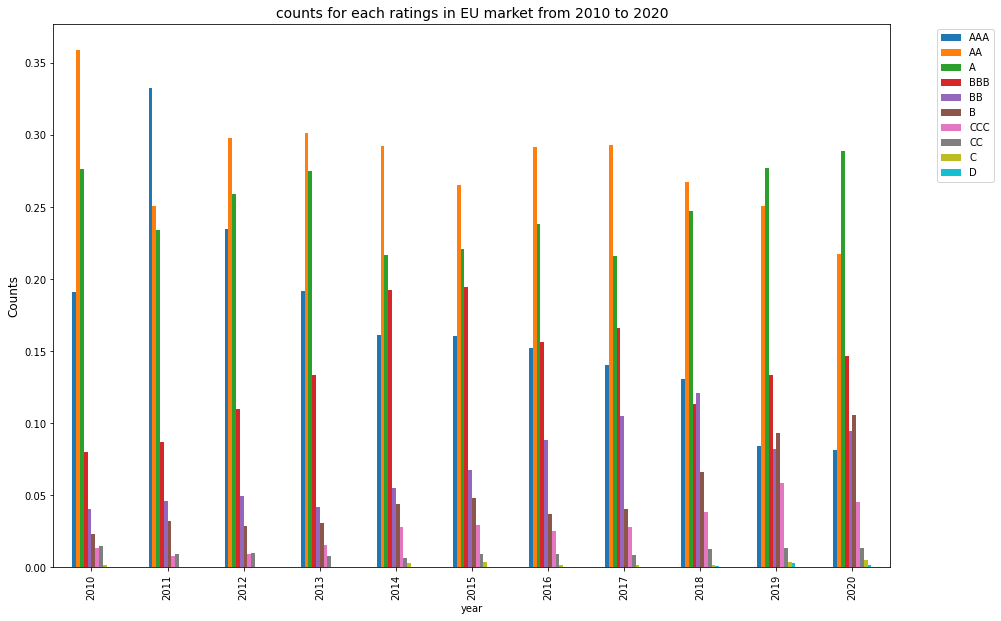

In [18]:
plt.rcParams["figure.figsize"] = (15, 10)
countgraph[['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left')
plt.ylabel('Year',size = 12)
plt.ylabel('Counts',size = 12)
plt.title('counts for each ratings in EU market from 2010 to 2020', size = 14)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/EU rating count.png') 


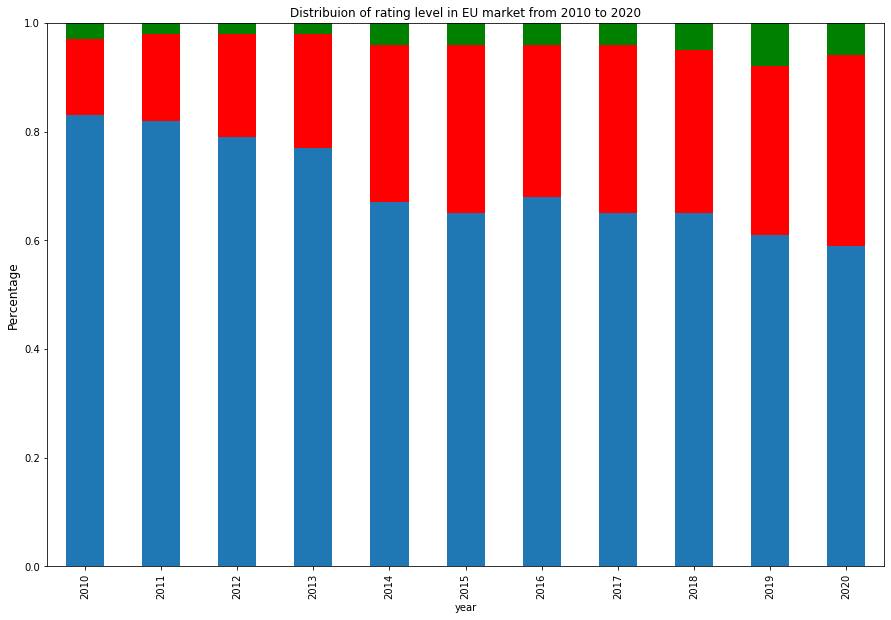

In [19]:
countgraph_percentage['A_sum'].plot(kind='bar')
countgraph_percentage['B_sum'].plot(kind='bar', bottom = countgraph_percentage['A_sum'], color = 'r')
countgraph_percentage['C_sum'].plot(kind='bar', bottom = countgraph_percentage['A_sum']+countgraph_percentage['B_sum'], color = 'g')
countgraph_percentage['D_sum'].plot(kind='bar', bottom = countgraph_percentage['A_sum']+countgraph_percentage['B_sum']+countgraph_percentage['C_sum'], color = 'y')
plt.ylabel('Percentage',size = 12)
plt.title('Distribuion of rating level in EU market from 2010 to 2020')
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/EU rating distribution.png') 

plt.show()

In [20]:
import pandas as pd             
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

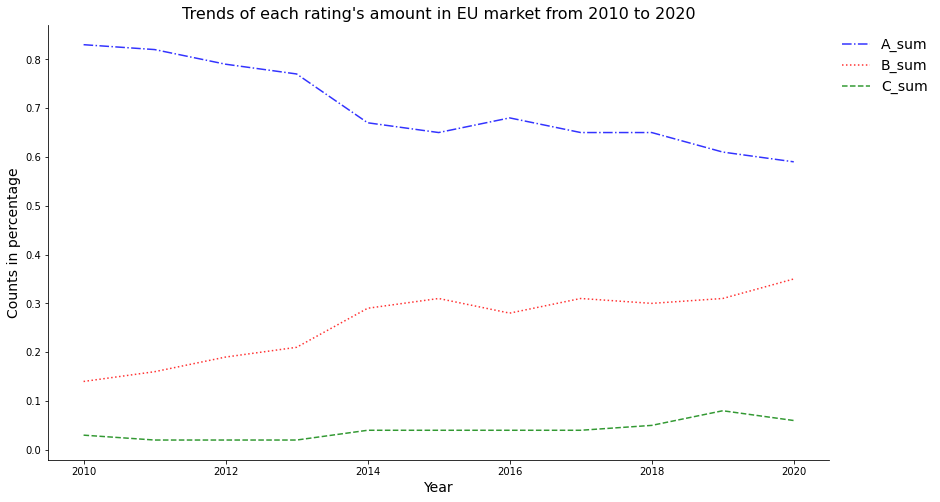

In [21]:
fig, ax = plt.subplots(figsize=(14,8)) 
ax.plot(countgraph_percentage.index, countgraph_percentage['A_sum'],
        color='blue', alpha = 0.8, linestyle = '-.', label = 'A_sum')  
ax.plot(countgraph_percentage.index, countgraph_percentage['B_sum'],
        color='red', alpha = 0.8, linestyle = ':', label = 'B_sum')
ax.plot(countgraph_percentage.index, countgraph_percentage['C_sum'],
        color='green', alpha = 0.8, linestyle = '--', label = 'C_sum')

ax.set_xlabel('Year', fontsize = 14) 
ax.set_ylabel('Counts in percentage', fontsize = 14)  

ax.set_title("Trends of each rating's amount in EU market from 2010 to 2020", fontsize = 16)

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.legend(frameon=False, fontsize=14,bbox_to_anchor=(1, 1) ,loc='upper left')
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/EU rating trend.png') 

plt.show()

In [22]:
count = cap_10to20.groupby(['reprisk_rating'])[['name']].count()
count.loc['total'] = np.sum(count, axis = 0)
count

,name
reprisk_rating,
A,18457
AA,20605
AAA,12166
B,3810
BB,5473
BBB,10278
C,157
CC,776
CCC,2087


In [23]:
for i in count.index:
    count.loc[i] = count.loc[i] / count.loc['total']
count_percent = round(count,3)
count_percent

,name
reprisk_rating,
A,0.250
AA,0.279
AAA,0.165
B,0.052
BB,0.074
BBB,0.139
C,0.002
CC,0.011
CCC,0.028


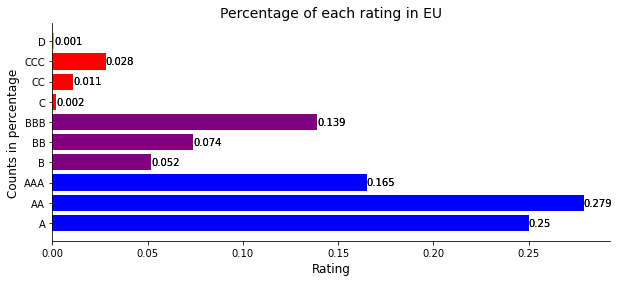

In [24]:
fig, ax = plt.subplots(figsize=(10,4)) 
New_Colors = ['blue','blue','blue','purple','purple','purple','red','red','red','orange']
bars =  ax.barh(count_percent.index[:-1], count_percent['name'][:-1], color=New_Colors)



ax.bar_label(bars)

for bars in ax.containers:
    ax.bar_label(bars)

ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Counts in percentage', fontsize=12)
ax.set_title('Percentage of each rating in EU', fontsize=14)

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/EU count_percentage.png') 

plt.show()

In [25]:
rri = cap_10to20.groupby(['reprisk_rating'])[['current_rri']].mean()
rri = round(rri,2)
rri

,current_rri
reprisk_rating,
A,8.58
AA,3.29
AAA,0.01
B,20.29
BB,17.15
BBB,13.41
C,47.85
CC,39.82
CCC,33.26


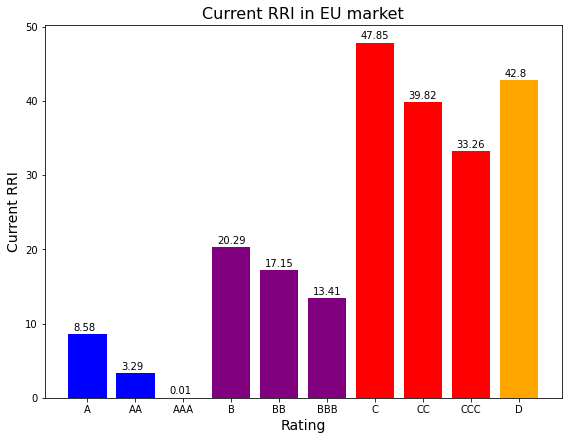

In [26]:
fig, ax = plt.subplots(figsize=(8,6)) 
New_Colors = ['blue','blue','blue','purple','purple','purple','red','red','red','orange']

plt.bar(rri.index, rri["current_rri"],color = New_Colors)


plt.xlabel('Rating', fontsize=14)
plt.ylabel('Current RRI', fontsize=14)

for index,data in enumerate(rri["current_rri"]):
    plt.text(x=index-0.3 , y =data+0.5 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.tight_layout()

plt.title('Current RRI in EU market', fontsize=16)

plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/EU c_rri.png') 

plt.show()

In [27]:
rri.loc["A's"] = (rri.loc['A'] + rri.loc['AA'] + rri.loc['AAA'])/3
rri.loc["B's"] = (rri.loc['B'] + rri.loc['BB'] + rri.loc['BBB'])/3
rri.loc["C's"] = (rri.loc['C'] + rri.loc['CC'] + rri.loc['CCC'])/3
rri.loc["D's"] = (rri.loc['D'])
rri

,current_rri
reprisk_rating,
A,8.58
AA,3.29
AAA,0.01
B,20.29
BB,17.15
BBB,13.41
C,47.85
CC,39.82
CCC,33.26


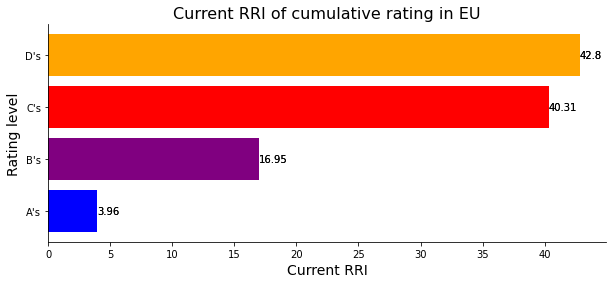

In [28]:
fig, ax = plt.subplots(figsize=(10,4)) 
New_Colors = ['blue','purple','red','orange']
bars = ax.barh(rri.index[-4:], rri.loc[["A's","B's","C's","D's"]]['current_rri'], color=New_Colors)

ax.bar_label(bars)

for bars in ax.containers:
    ax.bar_label(bars,)
ax.set_xlabel('Current RRI', fontsize=14)
ax.set_ylabel('Rating level', fontsize=14)
ax.set_title('Current RRI of cumulative rating in EU', fontsize=16)

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/EU cumulative c_rri.png') 

plt.show()


In [29]:
meangraph = cap_10to20.groupby(['year','reprisk_rating'])['monthly_return'].mean().unstack('reprisk_rating')
meangraph 

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D
year,,,,,,,,,,
2010,0.011456,0.012577,0.017056,-0.028218,0.013315,0.004423,-0.018155,-0.003661,0.012269,NaN
2011,-0.018996,-0.009488,-0.008972,-0.022592,-0.022695,-0.013207,NaN,-0.008385,-0.001894,-0.033333
2012,0.014209,0.020648,0.011511,0.034277,0.000575,0.009078,NaN,0.008597,0.013423,NaN
2013,0.025922,0.024833,0.029577,0.034928,0.025065,0.033814,0.002122,0.008205,0.027159,NaN
2014,0.005300,0.008284,0.002701,-0.001415,-0.002231,-0.000985,-0.003330,0.007877,-0.000806,NaN
2015,0.014088,0.016813,0.016225,0.016953,0.006805,0.010101,0.009189,0.006800,0.000799,NaN
2016,0.007514,0.014262,0.014704,0.000827,0.012371,0.004816,-0.001763,0.007137,0.002381,NaN
2017,0.015760,0.014865,0.012891,0.015525,0.013497,0.024983,0.003438,0.010550,0.015450,NaN
2018,-0.009163,-0.011460,-0.005029,-0.011052,-0.011901,-0.017788,-0.000675,-0.035491,-0.005361,-0.022596


In [30]:
meangraph["A's"] = (meangraph['A'] + meangraph['AA'] + meangraph['AAA'])/3
meangraph["B's"] = (meangraph['B'] + meangraph['BB'] + meangraph['BBB'])/3
meangraph["C's"] = (meangraph['C'].fillna(np.mean(meangraph['C'])) + meangraph['CC'] + meangraph['CCC'])/3
meangraph["D's"] = (meangraph['D'].fillna(np.mean(meangraph['D'])))

meangraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,A's,B's,C's,D's
year,,,,,,,,,,,,,,
2010,0.011456,0.012577,0.017056,-0.028218,0.013315,0.004423,-0.018155,-0.003661,0.012269,NaN,0.013696,-0.003493,-0.003182,-0.025350
2011,-0.018996,-0.009488,-0.008972,-0.022592,-0.022695,-0.013207,NaN,-0.008385,-0.001894,-0.033333,-0.012485,-0.019498,-0.002680,-0.033333
2012,0.014209,0.020648,0.011511,0.034277,0.000575,0.009078,NaN,0.008597,0.013423,NaN,0.015456,0.014643,0.008086,-0.025350
2013,0.025922,0.024833,0.029577,0.034928,0.025065,0.033814,0.002122,0.008205,0.027159,NaN,0.026777,0.031269,0.012495,-0.025350
2014,0.005300,0.008284,0.002701,-0.001415,-0.002231,-0.000985,-0.003330,0.007877,-0.000806,NaN,0.005429,-0.001544,0.001247,-0.025350
2015,0.014088,0.016813,0.016225,0.016953,0.006805,0.010101,0.009189,0.006800,0.000799,NaN,0.015709,0.011287,0.005596,-0.025350
2016,0.007514,0.014262,0.014704,0.000827,0.012371,0.004816,-0.001763,0.007137,0.002381,NaN,0.012160,0.006005,0.002585,-0.025350
2017,0.015760,0.014865,0.012891,0.015525,0.013497,0.024983,0.003438,0.010550,0.015450,NaN,0.014505,0.018001,0.009813,-0.025350
2018,-0.009163,-0.011460,-0.005029,-0.011052,-0.011901,-0.017788,-0.000675,-0.035491,-0.005361,-0.022596,-0.008551,-0.013580,-0.013842,-0.022596


Text(0.5, 1.0, 'mean returns for each ratings in EU market')

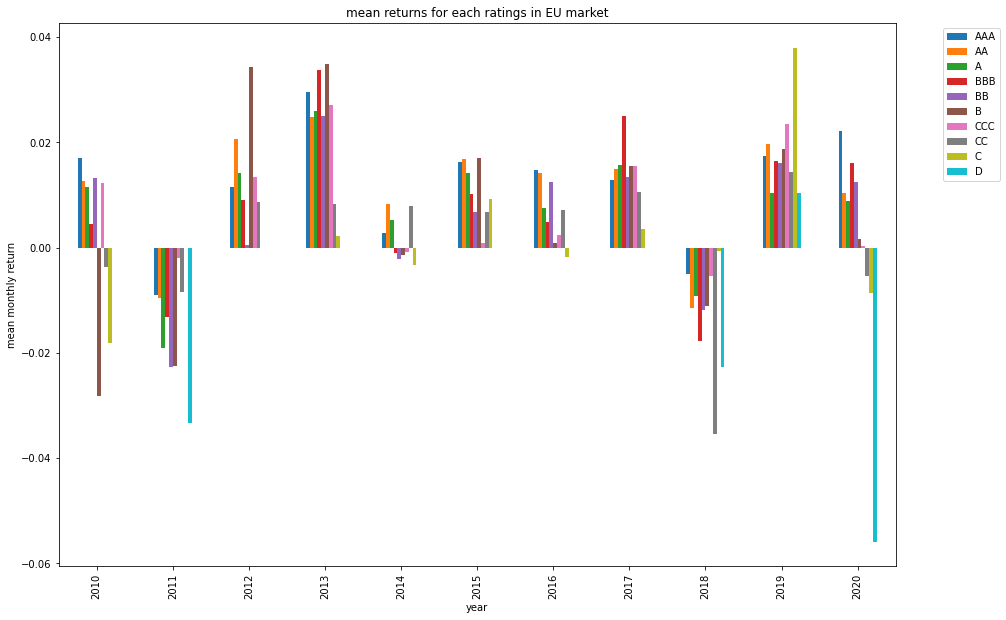

In [31]:
plt.rcParams["figure.figsize"] = (15, 10)
meangraph[['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('mean monthly return')
plt.title('mean returns for each ratings in EU market')

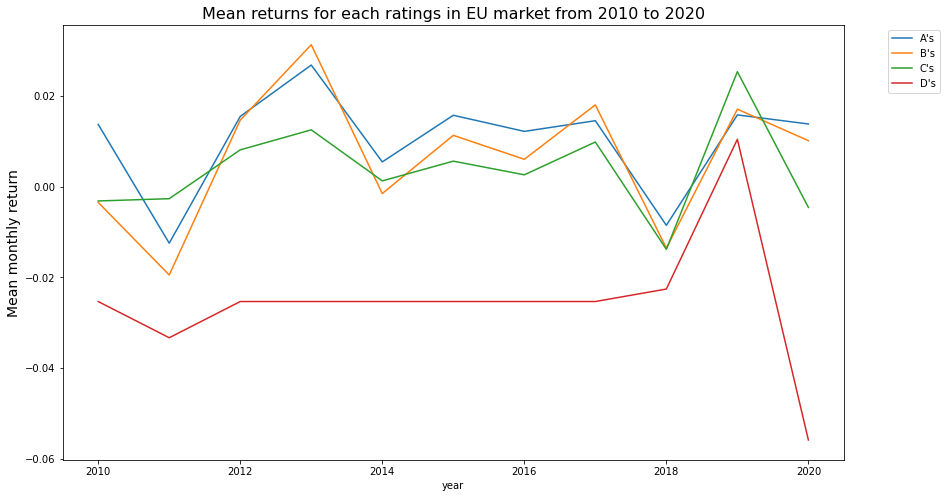

In [32]:
plt.rcParams["figure.figsize"] = (14, 8)
meangraph[["A's", "B's","C's","D's"]].plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Mean monthly return',size =14)
plt.title('Mean returns for each ratings in EU market from 2010 to 2020', size = 16)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/EU mean returns.png') 


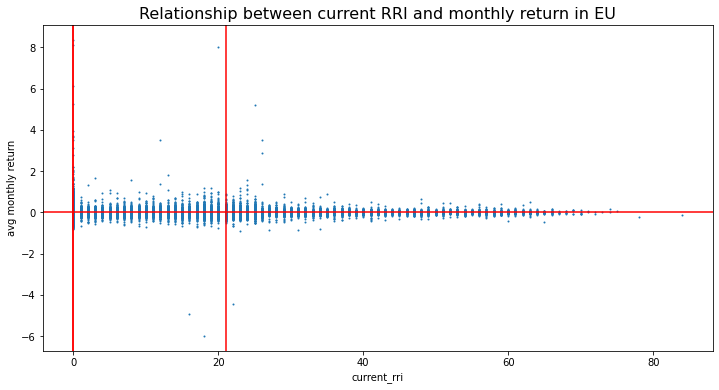

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.scatter('current_rri', 'monthly_return',data=cap_10to20, s=1)
plt.xlabel('current_rri')
plt.ylabel('avg monthly return')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.axvline(x = cap_10to20['current_rri'].quantile(.2), color = 'r', linestyle = '-')
plt.axvline(x = cap_10to20['current_rri'].quantile(.5), color = 'r', linestyle = '-')
plt.axvline(x = cap_10to20['current_rri'].quantile(.8), color = 'r', linestyle = '-')
plt.title('Relationship between current RRI and monthly return in EU', fontsize=16)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/EU current RRI & monthly return.png')
plt.show()


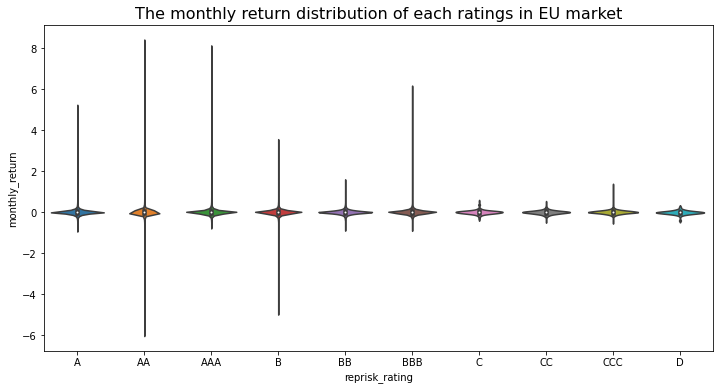

In [34]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.violinplot(x='reprisk_rating', y='monthly_return', data=cap_10to20.sort_values('reprisk_rating'))
plt.title('The monthly return distribution of each ratings in EU market', fontsize=16)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/EU return distribution.png') 


In [35]:
cap_10to20.groupby('year')['monthly_return','reprisk_rating'].count()

<ipython-input-35-2cf3d8836eeb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cap_10to20.groupby('year')['monthly_return','reprisk_rating'].count()


,monthly_return,reprisk_rating
year,,
2010,5793,5793
2011,5988,5988
2012,6115,6115
2013,6191,6191
2014,6504,6504
2015,6826,6826
2016,7137,7137
2017,7296,7296
2018,7342,7342


In [36]:
import numpy as np
compare = np.mean(cap_10to20.loc[( (cap_10to20['year'] == 2020) | (cap_10to20['year'] == 2019)) & 
((cap_10to20['reprisk_rating'] == 'CCC') & (cap_10to20['monthly_return'] > 0)),:]['monthly_return'])


cap_10to20.loc[( (cap_10to20['year'] == 2020) | (cap_10to20['year'] == 2019)) & 
(((cap_10to20['reprisk_rating'] == 'CCC')|(cap_10to20['reprisk_rating'] == 'CC')) & (cap_10to20['monthly_return'] > compare)),:].groupby(['name','reprisk_rating','year']).agg({'monthly_return':'mean'}).sort_values('monthly_return', ascending = False)

,,,monthly_return
name,reprisk_rating,year,
AS Roma SpA,CCC,2020,0.547944
Biancamano SpA,CCC,2019,0.450000
Webuild SpA (formerly Salini Impregilo SpA; Impregilo SpA),CCC,2020,0.392061
TotalEnergies SE (formerly Total SE; Total SA),CC,2020,0.387490
Piaggio & C SpA,CCC,2020,0.362597
Webuild SpA (formerly Salini Impregilo SpA; Impregilo SpA),CCC,2019,0.355932
Fincantieri SpA (formerly Italcantieri SpA),CCC,2020,0.350874
Sogefi SpA,CCC,2020,0.340491
Mota-Engil SGPS SA (Mota Engil),CCC,2020,0.326047


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship between current RRI and monthly return')

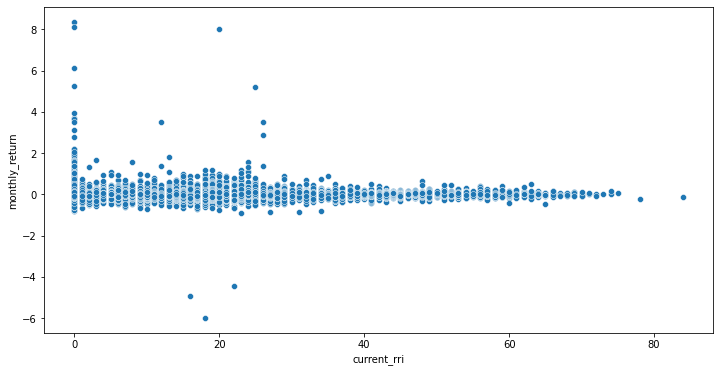

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot('current_rri','monthly_return', data=cap_10to20)
ax.set_title('Relationship between current RRI and monthly return', fontsize=16)

In [38]:
country_data = cap_10to20.groupby(['year','reprisk_rating'])['country_sector_average'].mean().unstack('reprisk_rating')
country_data

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D
year,,,,,,,,,,
2010,31.331250,22.663143,13.567690,41.578947,37.832618,33.265086,46.444444,49.941860,50.746835,NaN
2011,29.997145,22.592938,15.328149,42.015707,37.120000,33.376200,NaN,45.446429,51.795918,84.000000
2012,27.469994,22.093801,13.952679,42.429379,36.954098,32.518629,NaN,43.258065,38.912281,NaN
2013,26.009971,21.267131,14.013457,40.911458,36.030769,32.083434,46.000000,46.224490,38.071429,NaN
2014,24.914184,21.120862,14.045671,43.814035,37.274510,29.779376,47.954545,37.431818,36.182320,NaN
2015,24.268874,21.209046,13.004558,43.078550,36.166667,29.979653,43.400000,39.596774,36.783920,NaN
2016,24.071638,20.864008,9.959596,42.397727,38.168521,33.960609,45.500000,36.953846,36.927374,NaN
2017,24.856238,21.179523,8.164717,43.969388,41.046936,35.091433,48.363636,45.365079,37.901478,NaN
2018,26.878304,22.373028,11.781705,48.890496,44.734234,32.844125,54.714286,52.054348,46.089286,61.714286


Text(0.5, 1.0, 'Mean of country-sector average for each ratings in EU market')

<Figure size 864x432 with 0 Axes>

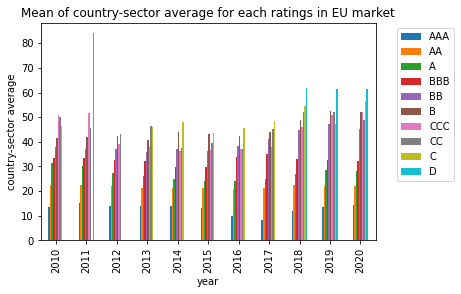

In [39]:
plt.figure(figsize=(12,6))
country_data[['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('country-sector average')
plt.title('Mean of country-sector average for each ratings in EU market')

In [40]:
country_data['A_sum'] = (country_data['A']+ country_data['AA']+ country_data['AAA'])/3
country_data['B_sum'] = (country_data['B']+ country_data['BB']+ country_data['BBB'])/3
country_data['C_sum'] = (country_data['C'].fillna(np.mean(meangraph['C']))+ country_data['CC']+ country_data['CCC'])/3
country_data["D_sum"] = (country_data['D'].fillna(np.mean(country_data['D'])))

country_data

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,A_sum,B_sum,C_sum,D_sum
year,,,,,,,,,,,,,,
2010,31.331250,22.663143,13.567690,41.578947,37.832618,33.265086,46.444444,49.941860,50.746835,NaN,22.520694,37.558884,49.044380,67.108059
2011,29.997145,22.592938,15.328149,42.015707,37.120000,33.376200,NaN,45.446429,51.795918,84.000000,22.639410,37.503969,32.414861,84.000000
2012,27.469994,22.093801,13.952679,42.429379,36.954098,32.518629,NaN,43.258065,38.912281,NaN,21.172158,37.300702,27.390861,67.108059
2013,26.009971,21.267131,14.013457,40.911458,36.030769,32.083434,46.000000,46.224490,38.071429,NaN,20.430186,36.341887,43.431973,67.108059
2014,24.914184,21.120862,14.045671,43.814035,37.274510,29.779376,47.954545,37.431818,36.182320,NaN,20.026906,36.955974,40.522895,67.108059
2015,24.268874,21.209046,13.004558,43.078550,36.166667,29.979653,43.400000,39.596774,36.783920,NaN,19.494159,36.408290,39.926898,67.108059
2016,24.071638,20.864008,9.959596,42.397727,38.168521,33.960609,45.500000,36.953846,36.927374,NaN,18.298414,38.175619,39.793740,67.108059
2017,24.856238,21.179523,8.164717,43.969388,41.046936,35.091433,48.363636,45.365079,37.901478,NaN,18.066826,40.035919,43.876731,67.108059
2018,26.878304,22.373028,11.781705,48.890496,44.734234,32.844125,54.714286,52.054348,46.089286,61.714286,20.344346,42.156285,50.952640,61.714286


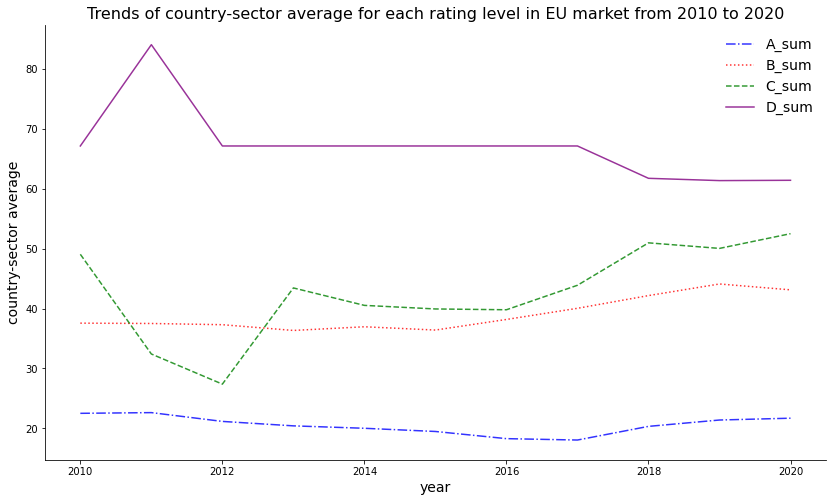

In [41]:
fig, ax = plt.subplots(figsize=(14,8)) 
ax.plot(country_data.index, country_data['A_sum'],
        color='blue', alpha = 0.8, linestyle = '-.', label = 'A_sum')  
ax.plot(country_data.index, country_data['B_sum'],
        color='red', alpha = 0.8, linestyle = ':', label = 'B_sum')
ax.plot(country_data.index, country_data['C_sum'],
        color='green', alpha = 0.8, linestyle = '--', label = 'C_sum')
ax.plot(country_data.index, country_data['D_sum'],
        color='purple', alpha = 0.8, linestyle = '-', label = 'D_sum')

ax.set_xlabel('year', fontsize = 14) 
ax.set_ylabel('country-sector average', fontsize = 14)  

ax.set_title('Trends of country-sector average for each rating level in EU market from 2010 to 2020', fontsize = 16)

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.legend(frameon=False, fontsize=14)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/EU Country.png') 

plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


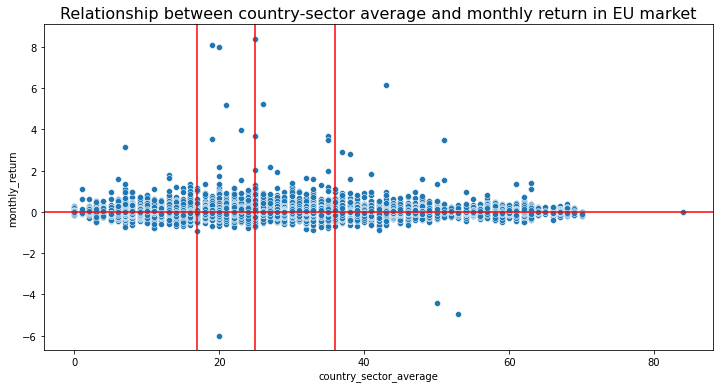

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot('country_sector_average','monthly_return', data=cap_10to20)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.axvline(x = cap_10to20['country_sector_average'].quantile(.2), color = 'r', linestyle = '-')
plt.axvline(x = cap_10to20['country_sector_average'].quantile(.5), color = 'r', linestyle = '-')
plt.axvline(x = cap_10to20['country_sector_average'].quantile(.8), color = 'r', linestyle = '-')
plt.title('Relationship between country-sector average and monthly return in EU market', fontsize=16)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/EU relationship country & monthly return.png') 


In [43]:
cap_10to20['country_sector_average'].quantile(.2)

17.0

In [44]:
cap_10to20['country_sector_average'].quantile(.5)

25.0

In [45]:
cap_10to20['country_sector_average'].quantile(.8)

36.0